In [88]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression,RidgeCV
import patsy


import seaborn as sns
import matplotlib.pyplot as plt

# loading in data
full_player_data_df = pd.read_csv("player_data.csv")

In [2]:
pd.set_option("display.max_columns", None)
full_player_data_df

,Player,Pos,Age,Tm,BMI,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_id,Height,Weight,Dist.,%2P,%0-3,%3-10,%10-16,%16-3P,%3P,Games_Missed,Pct_Games_Missed,0-3_A,3-10_A,10-16_A,16-3P_A
0,Álex Abrines,SG,23,OKC,23.109796,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,0.6,1.4,0.426,0.531,0.6,0.7,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,10.1,0.560,0.724,0.144,1.9,7.1,4.5,5.5,1.7,0.6,8.3,15.9,1.2,0.9,2.1,0.096,-1.3,-0.4,-1.6,0.1,abrinal01,78.0,200.0,20.6,0.276,0.120,0.047,0.044,0.065,0.724,14,0.170732,0.6000,0.2350,0.2200,0.3250
1,Steven Adams,C,23,OKC,27.042386,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,4.7,8.2,0.572,0.571,2.0,3.2,0.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,16.5,0.589,0.002,0.392,13.0,15.4,14.2,5.4,1.8,2.6,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1,adamsst01,83.0,265.0,3.7,0.998,0.557,0.388,0.046,0.005,0.002,2,0.024390,4.5674,3.1816,0.3772,0.0410
2,Arron Afflalo,SG,31,SAC,24.899646,61,45,25.9,3.0,6.9,0.440,1.0,2.5,0.411,2.0,4.4,0.457,0.514,1.4,1.5,0.892,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,8.9,0.559,0.360,0.221,0.7,8.4,4.6,7.4,0.7,0.3,8.4,14.4,1.2,0.2,1.4,0.043,-2.1,-1.5,-3.6,-0.7,afflaar01,77.0,210.0,16.8,0.640,0.100,0.117,0.186,0.236,0.360,21,0.256098,0.6900,0.8073,1.2834,1.6284
3,Alexis Ajinça,C,28,NOP,23.572742,39,15,15.0,2.3,4.6,0.500,0.0,0.1,0.000,2.3,4.5,0.511,0.500,0.7,1.0,0.725,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,12.9,0.529,0.022,0.225,8.3,23.8,16.0,3.1,1.7,3.1,13.7,17.2,0.0,0.9,1.0,0.080,-4.0,0.7,-3.3,-0.2,ajincal01,86.0,248.0,9.0,0.978,0.348,0.253,0.107,0.270,0.022,43,0.524390,1.6008,1.1638,0.4922,1.2420
4,LaMarcus Aldridge,PF,31,SAS,25.511685,72,72,32.4,6.9,14.6,0.477,0.3,0.8,0.411,6.6,13.8,0.480,0.488,3.1,3.8,0.812,2.4,4.9,7.3,1.9,0.6,1.2,1.4,2.2,17.3,18.6,0.532,0.053,0.258,8.5,16.6,12.7,9.9,1.0,3.0,7.7,24.5,3.5,3.7,7.2,0.149,0.7,0.1,0.8,1.7,aldrila01,83.0,250.0,11.8,0.947,0.222,0.194,0.202,0.328,0.053,10,0.121951,3.2412,2.8324,2.9492,4.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,Garrett Temple,SG,32,TOT,23.121100,75,55,27.2,2.8,6.6,0.422,1.2,3.5,0.341,1.6,3.1,0.515,0.513,1.1,1.4,0.748,0.4,2.5,2.9,1.4,1.0,0.4,0.9,2.7,7.8,8.5,0.543,0.535,0.217,1.5,10.2,5.8,7.4,1.8,1.4,11.5,13.2,0.3,2.0,2.2,0.052,-3.3,0.5,-2.8,-0.4,templga01,77.0,195.0,16.7,0.465,0.221,0.083,0.079,0.081,0.535,7,0.085366,1.4586,0.5478,0.5214,0.5346
1376,Jonas Valančiūnas,C,26,TOT,27.042386,49,27,22.3,6.1,11.0,0.559,0.3,1.0,0.292,5.9,10.0,0.586,0.572,3.0,3.8,0.795,2.2,6.4,8.6,1.4,0.4,1.1,1.8,3.0,15.6,24.4,0.616,0.089,0.344,10.7,31.4,21.1,12.0,0.8,4.4,12.7,28.5,2.2,1.9,4.2,0.183,2.2,0.4,2.6,1.3,valanjo01,83.0,265.0,7.0,0.911,0.390,0.375,0.115,0.030,0.089,33,0.402439,4.2900,4.1250,1.2650,0.3300
1377,Christian Wood,PF,23,TOT,22.373885,21,2,12.0,2.9,5.6,0.521,0.4,1.2,0.346,2.5,4.3,0.571,0.560,2.0,2.7,0.732,0.8,3.1,4.0,0.4,0.3,0.5,0.8,0.8,8.2,21.9,0.607,0.222,0.479,7.2,26.5,17.0,4.8,1.3,3.2,10.7,26.1,0.4,0.3,0.8,0.151,1.4,-1.0,0.4,0.1,woodch01,82.0,214.0,9.2,0.778,0.427,0.248,0.051,0.051,0.222,61,0.743902,2.3912,1.3888,0.2856,0.2856
1378,Delon Wright,PG,26,TOT,21.935402,75,13,22.7,3.2,7.4,0.434,0.7,2.2,0.298,2.6,5.2,0.492,0.478,1.6,2.0,0.793,0.9,2.6,3.5,3.3,1.2,0.4,1.0,1.4,8.7,15.5,0.523,0.301,0.269,4.4,12.8,8.6,21.6,2.5,1.6,11.0,18.1,1.9,2.4,4.3,0.121,0.1,1.4,1.5,1.5,wrighde01,77.0,185.0,10.8,0.699,0.401,0.206,0.065,0.027,0.301,7,0.085366,2.9674,1.5244,0.4810,0.1998


In [3]:
full_player_data_df.shape

(1380, 66)

In [4]:
full_player_data_df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'BMI', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'player_id', 'Height', 'Weight', 'Dist.', '%2P', '%0-3',
       '%3-10', '%10-16', '%16-3P', '%3P', 'Games_Missed', 'Pct_Games_Missed',
       '0-3_A', '3-10_A', '10-16_A', '16-3P_A'],
      dtype='object')

In [5]:
full_player_data_df.Pos.unique()

array(['SG', 'C', 'PF', 'SF', 'PG', 'PF-C', 'SF-SG', 'PG-SG', 'PF-SF',
       'SG-PF', 'C-PF', 'SG-SF'], dtype=object)

## Games Missed Regression

In [6]:
player_data_df = full_player_data_df[['Games_Missed','Age', 'Height', 'Weight', 'BMI', 'USG%', 'MP', 'FGA', 'FTA', 'PF', '2PA', 
                    '3PA', '0-3_A', '3-10_A', '10-16_A', '16-3P_A']]

In [7]:
player_data_df

,Games_Missed,Age,Height,Weight,BMI,USG%,MP,FGA,FTA,PF,2PA,3PA,0-3_A,3-10_A,10-16_A,16-3P_A
0,14,23,78.0,200.0,23.109796,15.9,15.5,5.0,0.7,1.7,1.4,3.6,0.6000,0.2350,0.2200,0.3250
1,2,23,83.0,265.0,27.042386,16.2,29.9,8.2,3.2,2.4,8.2,0.0,4.5674,3.1816,0.3772,0.0410
2,21,31,77.0,210.0,24.899646,14.4,25.9,6.9,1.5,1.7,4.4,2.5,0.6900,0.8073,1.2834,1.6284
3,43,28,86.0,248.0,23.572742,17.2,15.0,4.6,1.0,2.0,4.5,0.1,1.6008,1.1638,0.4922,1.2420
4,10,31,83.0,250.0,25.511685,24.5,32.4,14.6,3.8,2.2,13.8,0.8,3.2412,2.8324,2.9492,4.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,7,32,77.0,195.0,23.121100,13.2,27.2,6.6,1.4,2.7,3.1,3.5,1.4586,0.5478,0.5214,0.5346
1376,33,26,83.0,265.0,27.042386,28.5,22.3,11.0,3.8,3.0,10.0,1.0,4.2900,4.1250,1.2650,0.3300
1377,61,23,82.0,214.0,22.373885,26.1,12.0,5.6,2.7,0.8,4.3,1.2,2.3912,1.3888,0.2856,0.2856
1378,7,26,77.0,185.0,21.935402,18.1,22.7,7.4,2.0,1.4,5.2,2.2,2.9674,1.5244,0.4810,0.1998


In [8]:
# features, target = ['Age', 'Height', 'Weight', 'BMI', 'MP', 'FGA', 'FTA', 'PF', 
#                     'USG%', '2PA','%2P', '3PA', '%3P', '%0-3', '%3-10', '%10-16', '%16-3P'], 'Games_Missed'

features, target = ['Age', 'Height', 'Weight', 'BMI', 'USG%', 'MP', 'FGA', 'FTA', 'PF', '2PA', 
                    '3PA', '0-3_A', '3-10_A', '10-16_A', '16-3P_A'], 'Games_Missed'
X,y = player_data_df[features], player_data_df[target]

lm = LinearRegression() # construct LinearRegression model object
lm.fit(X,y) # fit model to our choice of features

LinearRegression()

In [10]:
preds = lm.predict(X)

# sns.jointplot(x=preds,y=y, hue=player_usg_data['Pos']) #, kind='reg'

In [11]:
def RMSE(actuals,preds):
    return np.sqrt(np.mean((actuals-preds)**2))

RMSE(y,preds)

18.00331795738056

In [12]:
def MAE(actuals,preds):
    return np.mean(np.abs(actuals-preds))

MAE(y,preds)

14.28022315866979

In [13]:
lm.score(X,y)

0.43522153990863977

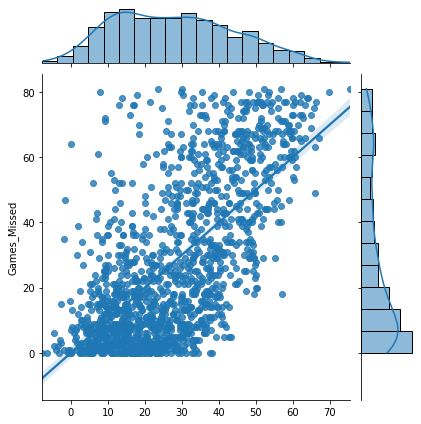

In [19]:
preds = lm.predict(X)

sns.jointplot(x=preds,y=y, kind='reg')

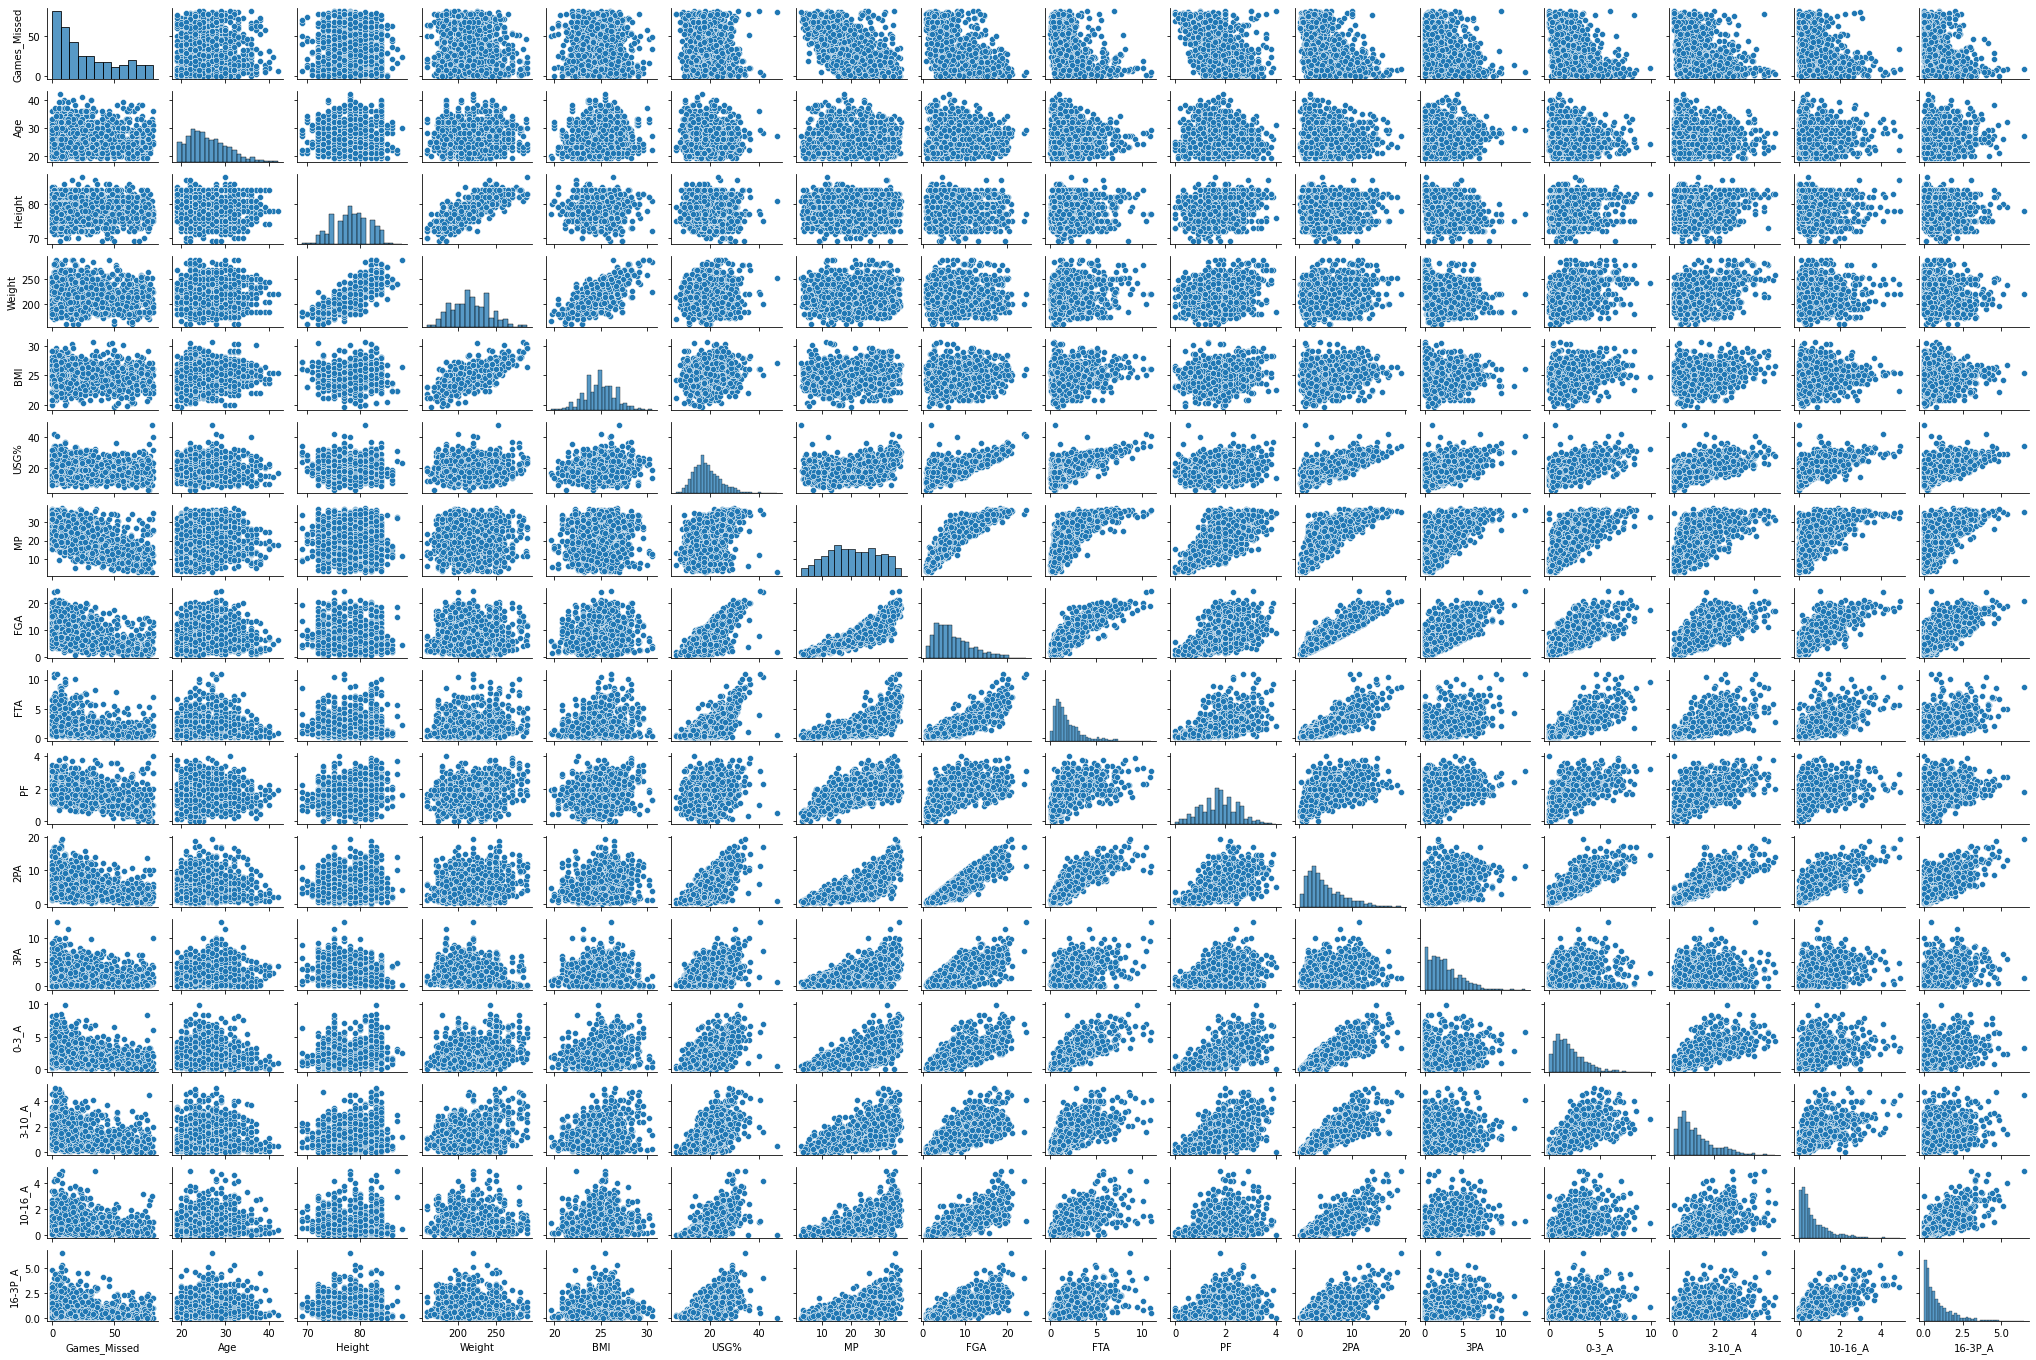

In [20]:
sns.pairplot(player_data_df,height=1.2, aspect=1.5);

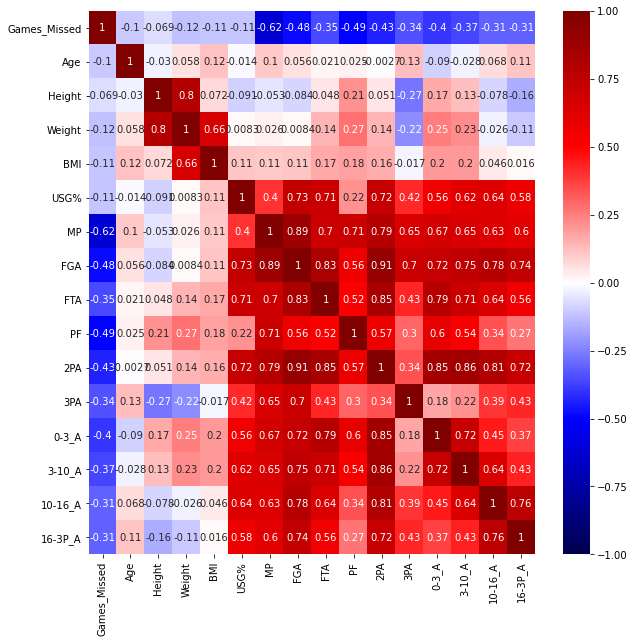

In [21]:
plt.subplots(figsize=(10,10))
sns.heatmap(player_data_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1);

## Player Usage Rate Regression

In [61]:
full_player_data_df

,Player,Pos,Age,Tm,BMI,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_id,Height,Weight,Dist.,%2P,%0-3,%3-10,%10-16,%16-3P,%3P,Games_Missed,Pct_Games_Missed,0-3_A,3-10_A,10-16_A,16-3P_A
0,Álex Abrines,SG,23,OKC,23.109796,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,0.6,1.4,0.426,0.531,0.6,0.7,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,10.1,0.560,0.724,0.144,1.9,7.1,4.5,5.5,1.7,0.6,8.3,15.9,1.2,0.9,2.1,0.096,-1.3,-0.4,-1.6,0.1,abrinal01,78.0,200.0,20.6,0.276,0.120,0.047,0.044,0.065,0.724,14,0.170732,0.6000,0.2350,0.2200,0.3250
1,Steven Adams,C,23,OKC,27.042386,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,4.7,8.2,0.572,0.571,2.0,3.2,0.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,16.5,0.589,0.002,0.392,13.0,15.4,14.2,5.4,1.8,2.6,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1,adamsst01,83.0,265.0,3.7,0.998,0.557,0.388,0.046,0.005,0.002,2,0.024390,4.5674,3.1816,0.3772,0.0410
2,Arron Afflalo,SG,31,SAC,24.899646,61,45,25.9,3.0,6.9,0.440,1.0,2.5,0.411,2.0,4.4,0.457,0.514,1.4,1.5,0.892,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,8.9,0.559,0.360,0.221,0.7,8.4,4.6,7.4,0.7,0.3,8.4,14.4,1.2,0.2,1.4,0.043,-2.1,-1.5,-3.6,-0.7,afflaar01,77.0,210.0,16.8,0.640,0.100,0.117,0.186,0.236,0.360,21,0.256098,0.6900,0.8073,1.2834,1.6284
3,Alexis Ajinça,C,28,NOP,23.572742,39,15,15.0,2.3,4.6,0.500,0.0,0.1,0.000,2.3,4.5,0.511,0.500,0.7,1.0,0.725,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,12.9,0.529,0.022,0.225,8.3,23.8,16.0,3.1,1.7,3.1,13.7,17.2,0.0,0.9,1.0,0.080,-4.0,0.7,-3.3,-0.2,ajincal01,86.0,248.0,9.0,0.978,0.348,0.253,0.107,0.270,0.022,43,0.524390,1.6008,1.1638,0.4922,1.2420
4,LaMarcus Aldridge,PF,31,SAS,25.511685,72,72,32.4,6.9,14.6,0.477,0.3,0.8,0.411,6.6,13.8,0.480,0.488,3.1,3.8,0.812,2.4,4.9,7.3,1.9,0.6,1.2,1.4,2.2,17.3,18.6,0.532,0.053,0.258,8.5,16.6,12.7,9.9,1.0,3.0,7.7,24.5,3.5,3.7,7.2,0.149,0.7,0.1,0.8,1.7,aldrila01,83.0,250.0,11.8,0.947,0.222,0.194,0.202,0.328,0.053,10,0.121951,3.2412,2.8324,2.9492,4.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,Garrett Temple,SG,32,TOT,23.121100,75,55,27.2,2.8,6.6,0.422,1.2,3.5,0.341,1.6,3.1,0.515,0.513,1.1,1.4,0.748,0.4,2.5,2.9,1.4,1.0,0.4,0.9,2.7,7.8,8.5,0.543,0.535,0.217,1.5,10.2,5.8,7.4,1.8,1.4,11.5,13.2,0.3,2.0,2.2,0.052,-3.3,0.5,-2.8,-0.4,templga01,77.0,195.0,16.7,0.465,0.221,0.083,0.079,0.081,0.535,7,0.085366,1.4586,0.5478,0.5214,0.5346
1376,Jonas Valančiūnas,C,26,TOT,27.042386,49,27,22.3,6.1,11.0,0.559,0.3,1.0,0.292,5.9,10.0,0.586,0.572,3.0,3.8,0.795,2.2,6.4,8.6,1.4,0.4,1.1,1.8,3.0,15.6,24.4,0.616,0.089,0.344,10.7,31.4,21.1,12.0,0.8,4.4,12.7,28.5,2.2,1.9,4.2,0.183,2.2,0.4,2.6,1.3,valanjo01,83.0,265.0,7.0,0.911,0.390,0.375,0.115,0.030,0.089,33,0.402439,4.2900,4.1250,1.2650,0.3300
1377,Christian Wood,PF,23,TOT,22.373885,21,2,12.0,2.9,5.6,0.521,0.4,1.2,0.346,2.5,4.3,0.571,0.560,2.0,2.7,0.732,0.8,3.1,4.0,0.4,0.3,0.5,0.8,0.8,8.2,21.9,0.607,0.222,0.479,7.2,26.5,17.0,4.8,1.3,3.2,10.7,26.1,0.4,0.3,0.8,0.151,1.4,-1.0,0.4,0.1,woodch01,82.0,214.0,9.2,0.778,0.427,0.248,0.051,0.051,0.222,61,0.743902,2.3912,1.3888,0.2856,0.2856
1378,Delon Wright,PG,26,TOT,21.935402,75,13,22.7,3.2,7.4,0.434,0.7,2.2,0.298,2.6,5.2,0.492,0.478,1.6,2.0,0.793,0.9,2.6,3.5,3.3,1.2,0.4,1.0,1.4,8.7,15.5,0.523,0.301,0.269,4.4,12.8,8.6,21.6,2.5,1.6,11.0,18.1,1.9,2.4,4.3,0.121,0.1,1.4,1.5,1.5,wrighde01,77.0,185.0,10.8,0.699,0.401,0.206,0.065,0.027,0.301,7,0.085366,2.9674,1.5244,0.4810,0.1998


In [84]:
player_usg_data = full_player_data_df[['USG%','Age', 'Height', 'Weight', 'BMI', 'FG%', '3P%', '2P%', 'FT%', 'PTS', 
                                       'AST', 'ORB','DRB', 'TRB','STL', 'BLK', 'PF','Dist.','%2P', 
                                       '%0-3','%3-10', '%10-16', '%16-3P', '%3P']]

In [86]:
# features, target = ['Age', 'Height', 'Weight', 'BMI', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 
#                     'FT', 'FTA','FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Dist.','%2P', 
#                     '%0-3','%3-10', '%10-16', '%16-3P', '%3P', '0-3_A', '3-10_A', '10-16_A', '16-3P_A'],'USG%'

features,target = ['Age', 'Height', 'Weight', 'BMI', 'FG%', '3P%', '2P%', 'FT%', 'PER', 
                                       'AST', 'ORB','DRB', 'TRB','STL', 'BLK', 'PF','Dist.','%2P', 
                                       '%0-3','%3-10', '%10-16', '%16-3P', '%3P'],'USG%'



X,y = full_player_data_df[features], full_player_data_df[target]
lm = LinearRegression() # construct LinearRegression model object
lm.fit(X,y) # fit model to our choice of features

LinearRegression()

In [63]:
# extract feature coefficients & intercept from fit model
print(lm.intercept_)
print(lm.coef_)

-22.211123507243638
[-8.26927000e-02 -5.54032566e-01  8.17435053e-02 -6.61592862e-01
 -5.49209367e+01  3.65278216e-01  1.13003101e+01 -4.03739295e+00
  1.04859737e+00  6.68113337e-02 -2.14121440e-01  2.13816072e+00
 -1.64408252e+00 -2.48030312e+00 -1.69773368e+00  1.46446058e+00
  2.29795331e-01  9.60283035e+01 -4.33700423e+00  1.15382696e+00
  8.37188032e-01 -3.03539597e+00  8.21029398e+01]


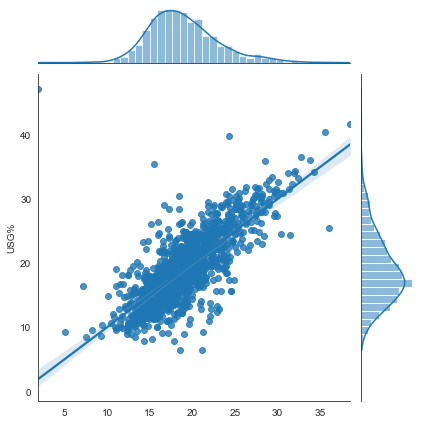

In [75]:
preds = lm.predict(X)
sns.set_style('white')
sns.jointplot(x=preds,y=y, kind='reg')

In [87]:
usg_model = sm.OLS(y, X, data=player_usg_data)
results = usg_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   USG%   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1960.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):                        0.00
Time:                        13:23:04   Log-Likelihood:                         -3629.6
No. Observations:                1380   AIC:                                      7305.
Df Residuals:                    1357   BIC:                                      7425.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0827      0.023     -3.593      0.000      -0.128      -0.038
Height        -0.5543      0.421     -1.318      0.188      -1.379       0.271
Weight         0.0818      0.077      1.069      0.285      -0.068       0.232
BMI           -0.6621      0.672     -0.986      0.324      -1.980       0.655
FG%          -54.9207      3.309    -16.595      0.000     -61.413     -48.429
3P%            0.3665      1.028      0.357      0.721      -1.649       2.382
2P%           11.3013      1.965      5.751      0.000       7.447      15.156
FT%           -4.0376      0.832     -4.855      0.000      -5.669      -2.406
PER            1.0486      0.039     26.706      0.000       0.972       1.126
AST            0.0668      0.092      0.723      0.470      -0.114       0.248
ORB           -0.2144      1.915     -0.112      0.911      -3.971       3.542
DRB            2.1379      1.912      1.118      0.264      -1.613       5.889
TRB           -1.6439      1.906     -0.862      0.389      -5.384       2.096
STL           -2.4804      0.351     -7.070      0.000      -3.169      -1.792
BLK           -1.6974      0.364     -4.665      0.000      -2.411      -0.984
PF             1.4643      0.208      7.048      0.000       1.057       1.872
Dist.          0.2294      0.247      0.929      0.353      -0.255       0.714
%2P           73.8329     33.721      2.190      0.029       7.681     139.985
%0-3          -4.3290      8.019     -0.540      0.589     -20.060      11.402
%3-10          1.1640      8.869      0.131      0.896     -16.235      18.563
%10-16         0.8482     10.364      0.082      0.935     -19.482      21.179
%16-3P        -3.0216     11.413     -0.265      0.791     -25.411      19.368
%3P           59.9234     34.060      1.759      0.079      -6.892     126.739
==============================================================================
Omnibus:                      781.058   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38113.708
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                      28.460   Cond. No.                     1.22e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
def SSE(actuals,preds):
    return np.sum((actuals-preds)**2)

SSE(y,preds)

15555.792063206607

In [77]:
def RMSE(actuals,preds):
    return np.sqrt(np.mean((actuals-preds)**2))

RMSE(y,preds)

3.3574265575407827

In [78]:
def MAE(actuals,preds):
    return np.mean(np.abs(actuals-preds))

MAE(y,preds)

2.3447526870306543

## R-squared

In [79]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y,preds)

0.5983780565200976

In [80]:
lm.score(X,y)

0.5983780565200976

In [71]:
X = player_usg_data.drop(columns=['USG%']).astype(float)

y = player_usg_data.loc[:,'USG%'].astype(float)

In [72]:
usg_model = sm.OLS(y, X, data=player_usg_data)
results = usg_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   USG%   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              2650.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):                        0.00
Time:                        12:35:54   Log-Likelihood:                         -3426.9
No. Observations:                1380   AIC:                                      6900.
Df Residuals:                    1357   BIC:                                      7020.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0469      0.020     -2.352      0.019      -0.086      -0.008
Height        -2.0605      0.364     -5.656      0.000      -2.775      -1.346
Weight         0.3766      0.066      5.682      0.000       0.247       0.507
BMI           -3.1408      0.582     -5.398      0.000      -4.282      -1.999
FG%          -19.6276      2.483     -7.906      0.000     -24.498     -14.757
3P%            0.0831      0.887      0.094      0.925      -1.656       1.822
2P%            4.5102      1.691      2.667      0.008       1.192       7.828
FT%           -2.8000      0.699     -4.008      0.000      -4.170      -1.430
PTS            0.9692      0.026     37.682      0.000       0.919       1.020
AST           -0.0163      0.078     -0.208      0.835      -0.170       0.137
ORB           -1.6109      1.652     -0.975      0.330      -4.853       1.631
DRB           -0.9518      1.649     -0.577      0.564      -4.187       2.283
TRB            0.7370      1.643      0.449      0.654      -2.486       3.960
STL           -2.5797      0.302     -8.535      0.000      -3.173      -1.987
BLK           -0.4826      0.310     -1.556      0.120      -1.091       0.126
PF            -1.2726      0.166     -7.676      0.000      -1.598      -0.947
Dist.          0.6222      0.212      2.940      0.003       0.207       1.037
%2P          189.4795     29.169      6.496      0.000     132.259     246.701
%0-3          -5.0649      6.907     -0.733      0.463     -18.614       8.484
%3-10         -4.5533      7.628     -0.597      0.551     -19.517      10.410
%10-16       -11.5926      8.901     -1.302      0.193     -29.053       5.868
%16-3P       -17.1197      9.794     -1.748      0.081     -36.332       2.093
%3P          161.8850     29.553      5.478      0.000     103.910     219.860
==============================================================================
Omnibus:                      355.204   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2681.822
Skew:                           0.985   Prob(JB):                         0.00
Kurtosis:                       9.539   Cond. No.                     1.23e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

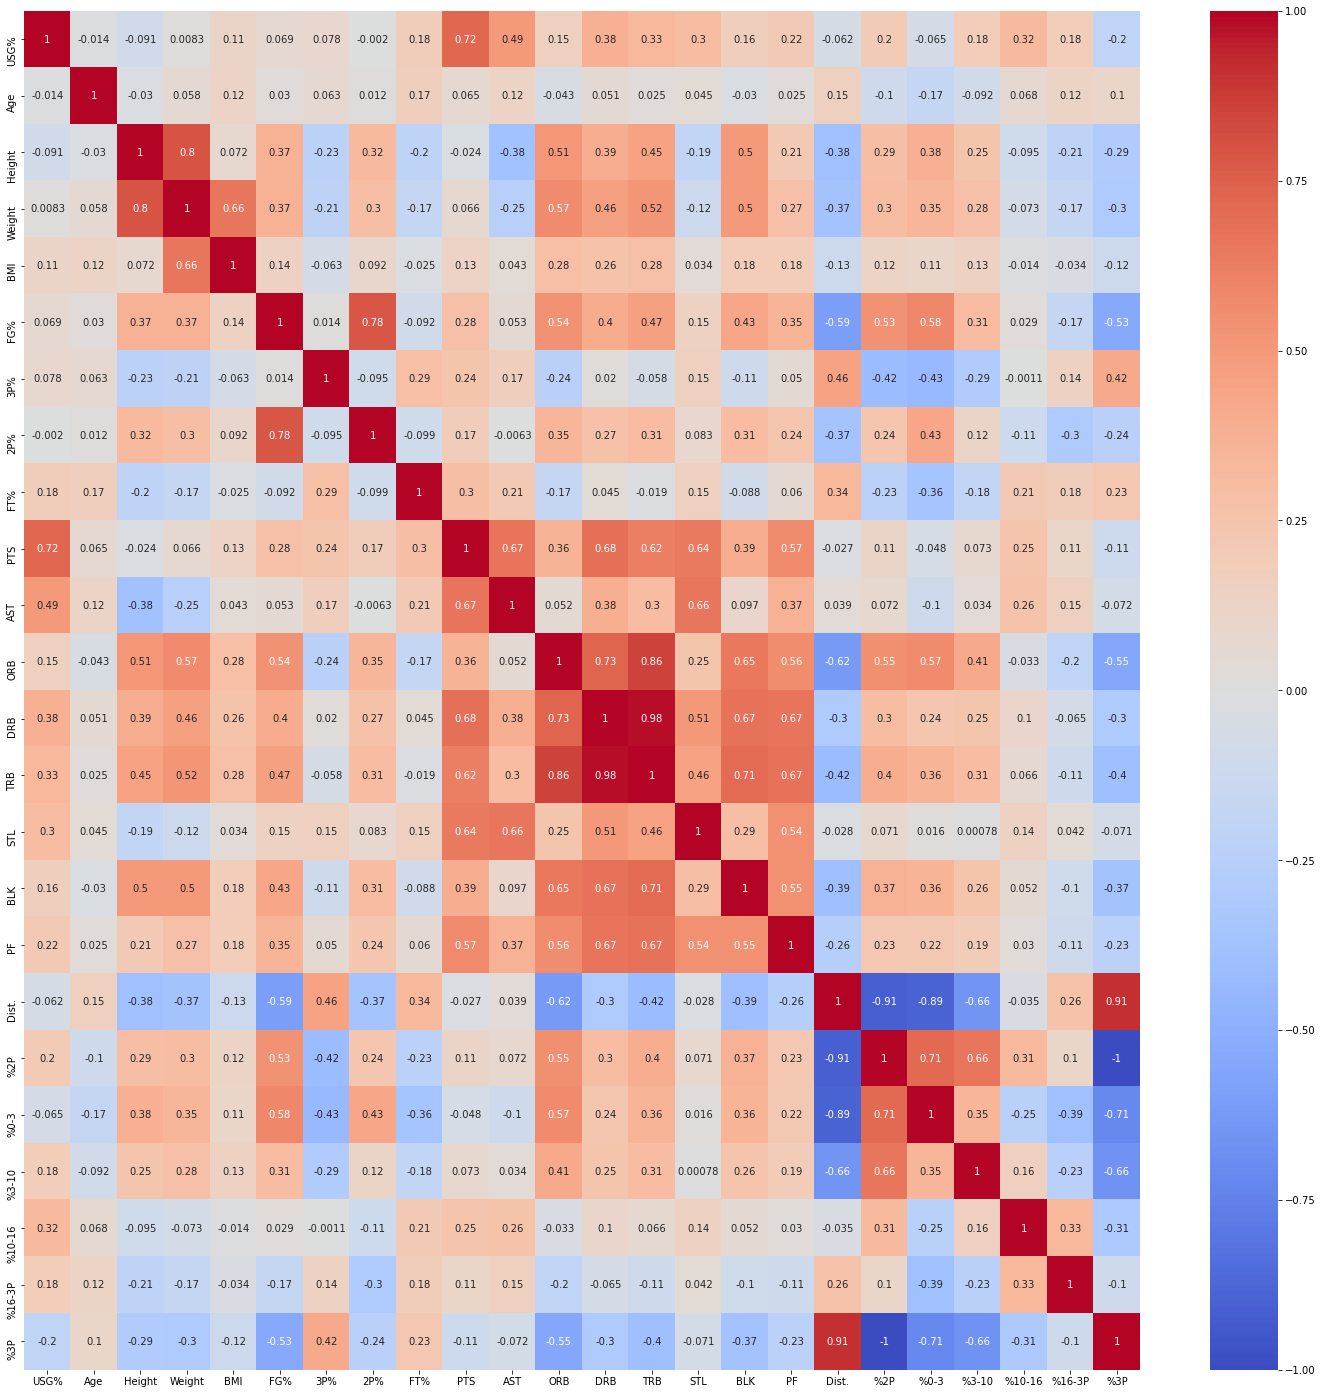

In [38]:
plt.subplots(figsize=(25,25))
sns.heatmap(player_usg_data.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(player_usg_data.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1);

In [ ]:
sns.pairplot(player_usg_data, height=1.2, aspect=1.5).savefig("usg_pairplot.png")

In [83]:
usg_model = sm.OLS(y, X, data=full_player_data_df[['USG%','Age', 'Height', 'Weight', 'BMI', 'FG%', '3P%', '2P%', 'FT%', 'PER', 
                                       'AST', 'ORB','DRB', 'TRB','STL', 'BLK', 'PF','Dist.','%2P', 
                                       '%0-3','%3-10', '%10-16', '%16-3P', '%3P']])
results = usg_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   USG%   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1960.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):                        0.00
Time:                        13:17:50   Log-Likelihood:                         -3629.6
No. Observations:                1380   AIC:                                      7305.
Df Residuals:                    1357   BIC:                                      7425.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0827      0.023     -3.593      0.000      -0.128      -0.038
Height        -0.5543      0.421     -1.318      0.188      -1.379       0.271
Weight         0.0818      0.077      1.069      0.285      -0.068       0.232
BMI           -0.6621      0.672     -0.986      0.324      -1.980       0.655
FG%          -54.9207      3.309    -16.595      0.000     -61.413     -48.429
3P%            0.3665      1.028      0.357      0.721      -1.649       2.382
2P%           11.3013      1.965      5.751      0.000       7.447      15.156
FT%           -4.0376      0.832     -4.855      0.000      -5.669      -2.406
PER            1.0486      0.039     26.706      0.000       0.972       1.126
AST            0.0668      0.092      0.723      0.470      -0.114       0.248
ORB           -0.2144      1.915     -0.112      0.911      -3.971       3.542
DRB            2.1379      1.912      1.118      0.264      -1.613       5.889
TRB           -1.6439      1.906     -0.862      0.389      -5.384       2.096
STL           -2.4804      0.351     -7.070      0.000      -3.169      -1.792
BLK           -1.6974      0.364     -4.665      0.000      -2.411      -0.984
PF             1.4643      0.208      7.048      0.000       1.057       1.872
Dist.          0.2294      0.247      0.929      0.353      -0.255       0.714
%2P           73.8329     33.721      2.190      0.029       7.681     139.985
%0-3          -4.3290      8.019     -0.540      0.589     -20.060      11.402
%3-10          1.1640      8.869      0.131      0.896     -16.235      18.563
%10-16         0.8482     10.364      0.082      0.935     -19.482      21.179
%16-3P        -3.0216     11.413     -0.265      0.791     -25.411      19.368
%3P           59.9234     34.060      1.759      0.079      -6.892     126.739
==============================================================================
Omnibus:                      781.058   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38113.708
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                      28.460   Cond. No.                     1.22e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

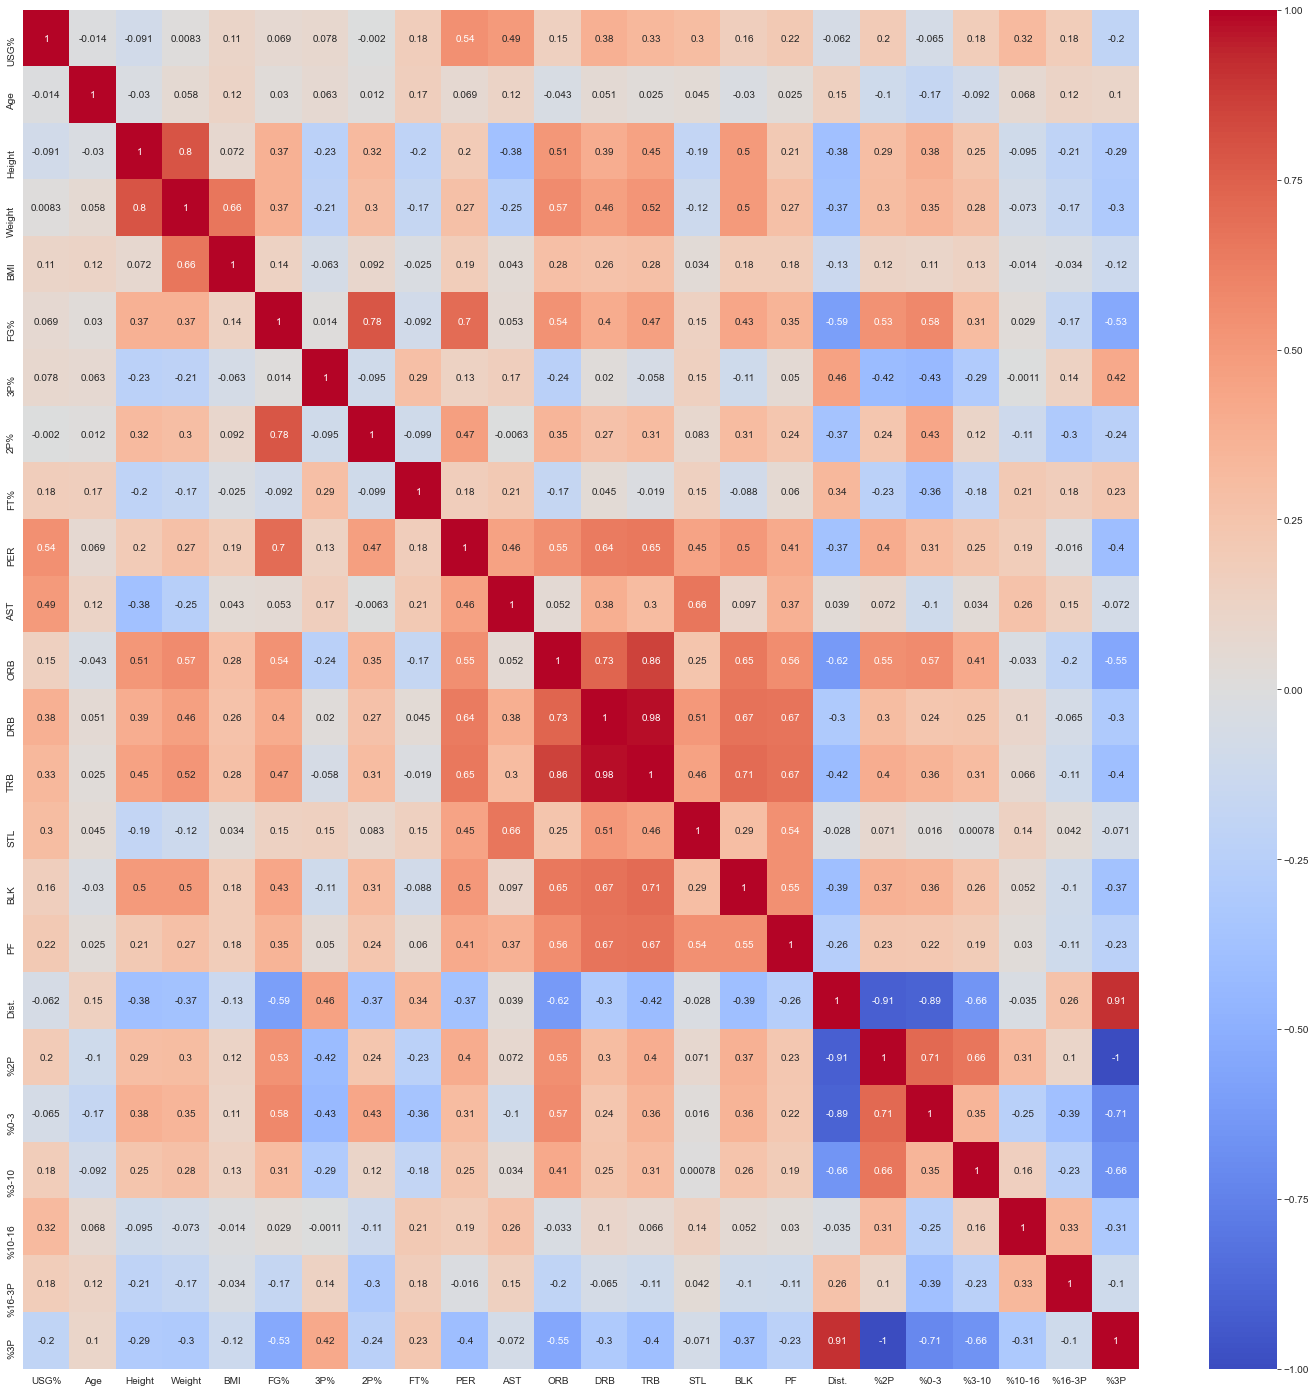

In [82]:
target_features = full_player_data_df[['USG%','Age', 'Height', 'Weight', 'BMI', 'FG%', '3P%', '2P%', 'FT%', 'PER', 
                                       'AST', 'ORB','DRB', 'TRB','STL', 'BLK', 'PF','Dist.','%2P', 
                                       '%0-3','%3-10', '%10-16', '%16-3P', '%3P']]

plt.subplots(figsize=(25,25))
sns.heatmap(target_features.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);

In [94]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices("Q('USG%') ~ Age +  Height  + Weight + BMI + Q('FG%') + Q('3P%') + Q('2P%') + Q('FT%') + PER + AST + ORB + DRB + TRB + STL + BLK + PF + Q('Dist.') + Q('%2P') + Q('%0-3') + Q('%3-10') + Q('%10-16') + Q('%16-3P') + Q('%3P')", 
                       data=full_player_data_df,return_type="dataframe")

# Create your model
usg_model = sm.OLS(y, X)

# Fit your model to your training set
fit = usg_model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Q('USG%')   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     87.84
Date:                Thu, 15 Apr 2021   Prob (F-statistic):          5.52e-249
Time:                        17:04:50   Log-Likelihood:                -3629.6
No. Observations:                1380   AIC:                             7307.
Df Residuals:                    1356   BIC:                             7433.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -22.2111   1220.714     -0.018      0.985   -2416.905    2372.483
Age            -0.0827      0.023     -3.588      0.000      -0.128      -0.037
Height         -0.5540      0.421     -1.316      0.188      -1.380       0.272
Weight          0.0817      0.077      1.067      0.286      -0.069       0.232
BMI            -0.6616      0.672     -0.984      0.325      -1.981       0.657
Q('FG%')      -54.9209      3.311    -16.589      0.000     -61.415     -48.426
Q('3P%')        0.3653      1.030      0.355      0.723      -1.656       2.386
Q('2P%')       11.3003      1.966      5.747      0.000       7.443      15.158
Q('FT%')       -4.0374      0.832     -4.853      0.000      -5.670      -2.405
PER             1.0486      0.039     26.694      0.000       0.972       1.126
AST             0.0668      0.092      0.723      0.470      -0.115       0.248
ORB            -0.2141      1.916     -0.112      0.911      -3.972       3.544
DRB             2.1382      1.913      1.118      0.264      -1.614       5.891
TRB            -1.6441      1.907     -0.862      0.389      -5.385       2.097
STL            -2.4803      0.351     -7.066      0.000      -3.169      -1.792
BLK            -1.6977      0.364     -4.659      0.000      -2.413      -0.983
PF              1.4645      0.208      7.041      0.000       1.056       1.872
Q('Dist.')      0.2298      0.248      0.927      0.354      -0.256       0.716
Q('%2P')       96.0283   1220.317      0.079      0.937   -2297.886    2489.942
Q('%0-3')      -4.3370      8.034     -0.540      0.589     -20.097      11.423
Q('%3-10')      1.1538      8.890      0.130      0.897     -16.286      18.594
Q('%10-16')     0.8372     10.385      0.081      0.936     -19.536      21.210
Q('%16-3P')    -3.0354     11.443     -0.265      0.791     -25.482      19.412
Q('%3P')       82.1029   1219.455      0.067      0.946   -2310.121    2474.326
==============================================================================
Omnibus:                      781.065   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38116.834
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                      28.461   Cond. No.                     5.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
# Defining model
lm1 = smf.ols("Q('USG%') ~ Age +  Height  + Weight + BMI + Q('FG%') + Q('3P%') + Q('2P%') + Q('FT%') + PER + AST + ORB + DRB + TRB + STL + BLK + PF + Q('Dist.') + Q('%2P') + Q('%0-3') + Q('%3-10') + Q('%10-16') + Q('%16-3P') + Q('%3P')", 
              data=full_player_data_df)

# Fitting the model
fit1 = lm1.fit()

# Print summary of model performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Q('USG%')   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     87.84
Date:                Thu, 15 Apr 2021   Prob (F-statistic):          5.52e-249
Time:                        17:07:30   Log-Likelihood:                -3629.6
No. Observations:                1380   AIC:                             7307.
Df Residuals:                    1356   BIC:                             7433.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -22.2111   1220.714     -0.018      0.985   -2416.905    2372.483
Age            -0.0827      0.023     -3.588      0.000      -0.128      -0.037
Height         -0.5540      0.421     -1.316      0.188      -1.380       0.272
Weight          0.0817      0.077      1.067      0.286      -0.069       0.232
BMI            -0.6616      0.672     -0.984      0.325      -1.981       0.657
Q('FG%')      -54.9209      3.311    -16.589      0.000     -61.415     -48.426
Q('3P%')        0.3653      1.030      0.355      0.723      -1.656       2.386
Q('2P%')       11.3003      1.966      5.747      0.000       7.443      15.158
Q('FT%')       -4.0374      0.832     -4.853      0.000      -5.670      -2.405
PER             1.0486      0.039     26.694      0.000       0.972       1.126
AST             0.0668      0.092      0.723      0.470      -0.115       0.248
ORB            -0.2141      1.916     -0.112      0.911      -3.972       3.544
DRB             2.1382      1.913      1.118      0.264      -1.614       5.891
TRB            -1.6441      1.907     -0.862      0.389      -5.385       2.097
STL            -2.4803      0.351     -7.066      0.000      -3.169      -1.792
BLK            -1.6977      0.364     -4.659      0.000      -2.413      -0.983
PF              1.4645      0.208      7.041      0.000       1.056       1.872
Q('Dist.')      0.2298      0.248      0.927      0.354      -0.256       0.716
Q('%2P')       96.0283   1220.317      0.079      0.937   -2297.886    2489.942
Q('%0-3')      -4.3370      8.034     -0.540      0.589     -20.097      11.423
Q('%3-10')      1.1538      8.890      0.130      0.897     -16.286      18.594
Q('%10-16')     0.8372     10.385      0.081      0.936     -19.536      21.210
Q('%16-3P')    -3.0354     11.443     -0.265      0.791     -25.482      19.412
Q('%3P')       82.1029   1219.455      0.067      0.946   -2310.121    2474.326
==============================================================================
Omnibus:                      781.065   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38116.834
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                      28.461   Cond. No.                     5.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
# Defining model
lm2 = smf.ols("Q('USG%') ~ Age +  Height  + Weight + BMI + Q('FG%') + Q('3P%') + Q('2P%') + Q('FT%') + PER + AST + ORB + DRB + TRB + STL + BLK + PF + Q('Dist.') + Q('%2P') + Q('%0-3') + Q('%3-10') + Q('%10-16') + Q('%16-3P') + Q('%3P')", 
              data=full_player_data_df)

# Fitting the model
fit2 = lm2.fit()

# Print summary of model performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Q('USG%')   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     87.84
Date:                Thu, 15 Apr 2021   Prob (F-statistic):          5.52e-249
Time:                        17:10:51   Log-Likelihood:                -3629.6
No. Observations:                1380   AIC:                             7307.
Df Residuals:                    1356   BIC:                             7433.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -22.2111   1220.714     -0.018      0.985   -2416.905    2372.483
Age            -0.0827      0.023     -3.588      0.000      -0.128      -0.037
Height         -0.5540      0.421     -1.316      0.188      -1.380       0.272
Weight          0.0817      0.077      1.067      0.286      -0.069       0.232
BMI            -0.6616      0.672     -0.984      0.325      -1.981       0.657
Q('FG%')      -54.9209      3.311    -16.589      0.000     -61.415     -48.426
Q('3P%')        0.3653      1.030      0.355      0.723      -1.656       2.386
Q('2P%')       11.3003      1.966      5.747      0.000       7.443      15.158
Q('FT%')       -4.0374      0.832     -4.853      0.000      -5.670      -2.405
PER             1.0486      0.039     26.694      0.000       0.972       1.126
AST             0.0668      0.092      0.723      0.470      -0.115       0.248
ORB            -0.2141      1.916     -0.112      0.911      -3.972       3.544
DRB             2.1382      1.913      1.118      0.264      -1.614       5.891
TRB            -1.6441      1.907     -0.862      0.389      -5.385       2.097
STL            -2.4803      0.351     -7.066      0.000      -3.169      -1.792
BLK            -1.6977      0.364     -4.659      0.000      -2.413      -0.983
PF              1.4645      0.208      7.041      0.000       1.056       1.872
Q('Dist.')      0.2298      0.248      0.927      0.354      -0.256       0.716
Q('%2P')       96.0283   1220.317      0.079      0.937   -2297.886    2489.942
Q('%0-3')      -4.3370      8.034     -0.540      0.589     -20.097      11.423
Q('%3-10')      1.1538      8.890      0.130      0.897     -16.286      18.594
Q('%10-16')     0.8372     10.385      0.081      0.936     -19.536      21.210
Q('%16-3P')    -3.0354     11.443     -0.265      0.791     -25.482      19.412
Q('%3P')       82.1029   1219.455      0.067      0.946   -2310.121    2474.326
==============================================================================
Omnibus:                      781.065   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38116.834
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                      28.461   Cond. No.                     5.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""